In [23]:
import numpy as np
import pandas as pd
import category_encoders as ce
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [25]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

# Reading Data

In [26]:
file_handler = FileHandler()

In [27]:
# reading the csv file
fraud_df = file_handler.read_csv("../data/raw/Fraud_Data.csv")
fraud_df.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0  
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0  
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0

In [28]:
# reading the csv file
ip_df = file_handler.read_csv("../data/raw/IpAddress_to_Country.csv")
ip_df.head(10)

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
5              16781312.0                16785407      Japan
6              16785408.0                16793599      China
7              16793600.0                16809983      Japan
8              16809984.0                16842751   Thailand
9              16842752.0                16843007      China

In [29]:
# reading the csv file
credit_df = file_handler.read_csv("../data/raw/creditcard.csv")
credit_df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   
6  0.081213  0.464960 -0.099254 -1.416907 -0.153826 -0.751063  0.167372   
7 -3.807864  0.615375  1.249376 -0.619468  0.291474  1.757964 -1.323865   
8  0.851084 -0.392048 -0.410430 -0.705117 -0.110452 -0.286254  0.074355   
9  0.069539 -0.736727 -0.366846  1.017614  0.836390  1.006844 -0.443523   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   
6  0.050144 -0.443587  0.002821 -0.611987 -0.045575 -0.219633 -0.167716   
7  0.686133 -0.076127 -1.222127 -0.358222  0.324505 -0.156742  1.943465   
8 -0.328783 -0.210077 -0.499768  0.118765  0.570328  0.052736 -0.073425   
9  0.150219  0.739453 -0.540980  0.476677  0.451773  0.203711 -0.246914   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   
6 -0.270710 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168   
7 -1.015455  0.057504 -0.649709 -0.415267 -0.051634 -1.206921 -1.085339   
8 -0.268092 -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404   
9 -0.633753 -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0  
5    3.67      0  
6    4.99      0  
7   40.80      0  
8   93.20      0  
9    3.68      0

# General Statistics

## fraud_df

In [30]:
# number of elements in the df
fraud_df.size

1662232

In [31]:
fraud_df.shape

(151112, 11)

In [32]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


## ip_df

In [33]:
# number of elements in the df
ip_df.size

416538

In [34]:
ip_df.shape

(138846, 3)

In [35]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## credit_df

In [36]:
# number of elements in the df
credit_df.size

8829017

In [37]:
credit_df.shape

(284807, 31)

In [38]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Missing Values

In [39]:
percent_missing_values(fraud_df)

The dataset contains 0.0 % missing values.


In [40]:
percent_missing_values(ip_df)

The dataset contains 0.0 % missing values.


In [41]:
percent_missing_values(credit_df)

The dataset contains 0.0 % missing values.


# Data Types

## fraud_df

In [42]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(fraud_df)

None of the columns contain mixed types.


In [43]:
fraud_df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [44]:
# get the columns with object data type
string_columns = fraud_df.select_dtypes(include='object').columns.tolist()
string_columns

['signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex']

In [45]:
convert_to_string(fraud_df, string_columns)

In [46]:
# get the columns with float data type
float_columns = fraud_df.select_dtypes(include='float64').columns.tolist()
float_columns

['ip_address']

In [47]:
convert_to_int(fraud_df, float_columns)

In [48]:
convert_to_datetime(fraud_df, ['signup_time'])

In [49]:
convert_to_datetime(fraud_df, ['purchase_time'])

In [50]:
fraud_df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id         string[python]
source            string[python]
browser           string[python]
sex               string[python]
age                        int64
ip_address                 int64
class                      int64
dtype: object

## ip_df

In [51]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(ip_df)

None of the columns contain mixed types.


In [52]:
ip_df.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [53]:
convert_to_string(ip_df, ['country'])

In [54]:
convert_to_int(ip_df, ['lower_bound_ip_address'])

In [55]:
ip_df.dtypes

lower_bound_ip_address             int64
upper_bound_ip_address             int64
country                   string[python]
dtype: object

## credit_df

In [56]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(credit_df)

None of the columns contain mixed types.


In [57]:
credit_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [58]:
convert_to_datetime(credit_df, ['Time'])

In [59]:
credit_df.dtypes

Time      datetime64[ns]
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Amount           float64
Class              int64
dtype: object

# Duplicates

In [60]:
# search for duplicate rows and drop them
drop_duplicates(fraud_df)

No duplicate rows were found.


In [61]:
# search for duplicate rows and drop them
drop_duplicates(ip_df)

No duplicate rows were found.


In [62]:
# search for duplicate rows and drop them
drop_duplicates(credit_df)

1081 duplicate rows were found and removed.


In [63]:
fraud_df.duplicated(subset=['user_id']).all()

False

# Feature Engineering

## Aggregate Features

In [64]:
fraud_df.describe().transpose()

count                           mean                  min  \
user_id         151112.0                   200171.04097                  2.0   
signup_time       151112  2015-04-20 00:56:09.511329280  2015-01-01 00:00:42   
purchase_time     151112  2015-06-16 02:56:38.759952896  2015-01-01 00:00:44   
purchase_value  151112.0                      36.935372                  9.0   
age             151112.0                      33.140704                 18.0   
ip_address      151112.0              2152145330.458693              52093.0   
class           151112.0                       0.093646                  0.0   

                                       25%                         50%  \
user_id                           100642.5                    199958.0   
signup_time     2015-02-18 09:52:48.500000         2015-04-19 04:41:30   
purchase_time   2015-04-18 14:41:25.500000  2015-06-18 13:46:17.500000   
purchase_value                        22.0                        35.0   
age                                   27.0                        33.0   
ip_address                    1085933882.0                2154770162.0   
class                                  0.0                         0.0   

                                          75%                  max  \
user_id                              300054.0             400000.0   
signup_time     2015-06-18 14:47:22.750000128  2015-08-18 04:40:29   
purchase_time      2015-08-17 18:48:31.500000  2015-12-16 02:56:05   
purchase_value                           49.0                154.0   
age                                      39.0                 76.0   
ip_address                      3243257679.25         4294850499.0   
class                                     0.0                  1.0   

                              std  
user_id             115369.285024  
signup_time                   NaN  
purchase_time                 NaN  
purchase_value          18.322762  
age                      8.617733  
ip_address      1248497030.099811  
class                    0.291336

In [65]:
fraud_df['hour_of_day'] = fraud_df['purchase_time'].apply(lambda x: x.hour)
fraud_df['day_of_week'] = fraud_df['purchase_time'].apply(lambda x: x.day)


In [66]:
fraud_df.head(5)

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class  hour_of_day  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0            2   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0            1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1           18   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0           13   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0           18   

   day_of_week  
0           18  
1            8  
2            1  
3            4  
4            9

In [67]:
fraud_df['transaction_time'] = fraud_df.apply(lambda x: x['purchase_time']-x['signup_time'],axis=1)

In [68]:
fraud_df.head(5)

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class  hour_of_day  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0            2   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0            1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1           18   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0           13   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0           18   

   day_of_week transaction_time  
0           18 52 days 03:51:22  
1            8  0 days 04:59:04  
2            1  0 days 00:00:01  
3            4  5 days 16:41:25  
4            9 50 days 11:31:01

In [70]:
fraud_df['transaction_frequency'] = fraud_df.apply(lambda x: 1/x['day_of_week'],axis=1)

In [71]:
fraud_df['velocity'] = fraud_df.apply(lambda x: x['transaction_frequency']/x['day_of_week'],axis=1)

In [72]:
fraud_df.sample(5)

user_id         signup_time       purchase_time  purchase_value  \
38385     91067 2015-07-19 18:57:03 2015-10-11 12:34:51              16   
60183    189168 2015-03-03 03:26:21 2015-06-23 23:08:02              27   
64419    227706 2015-02-17 22:15:37 2015-06-17 02:46:31              40   
29415      4832 2015-01-10 02:55:10 2015-01-10 02:55:11               9   
129273   181398 2015-03-17 10:59:48 2015-04-03 04:05:11              17   

            device_id  source  browser sex  age  ip_address  class  \
38385   SELRVOMRJVLAL     SEO  FireFox   F   35  1568216680      0   
60183   GUFMYFZBJLWJD     SEO   Chrome   F   30  1439857743      0   
64419   CLBFSJSGIGJMQ  Direct   Safari   M   45  1781184375      0   
29415   LQRQNWLSCTHZM     Ads   Chrome   F   30  1421335324      1   
129273  LPXWQJUVACHZK     SEO       IE   F   20   207737234      0   

        hour_of_day  day_of_week  transaction_time  transaction_frequency  \
38385            12           11  83 days 17:37:48               0.090909   
60183            23           23 112 days 19:41:41               0.043478   
64419             2           17 119 days 04:30:54               0.058824   
29415             2           10   0 days 00:00:01               0.100000   
129273            4            3  16 days 17:05:23               0.333333   

        velocity  
38385   0.008264  
60183   0.001890  
64419   0.003460  
29415   0.010000  
129273  0.111111

In [73]:
ip_df.sample(5)

lower_bound_ip_address  upper_bound_ip_address        country
132594              3526967296              3526983679      Hong Kong
33655               1842200576              1842202623    Netherlands
67066               3228249344              3228249599  United States
39681               2311454720              2311520255  United States
66952               3228077568              3228077823    Netherlands

In [74]:
ip_df['ip_address'] = ip_df.apply(lambda x: x['upper_bound_ip_address'] - x['lower_bound_ip_address'],axis=1)

In [75]:
ip_df.sample(10)

lower_bound_ip_address  upper_bound_ip_address  \
87757               3273438208              3273438719   
29508               1729091584              1729092607   
29977               1729479680              1729480703   
41477               2427207680              2427224063   
94495               3326795776              3326796799   
132501              3524247552              3524255743   
3301                 629198848               629202943   
93094               3323394048              3323394303   
96070               3331076096              3331077119   
92254               3302957056              3302957311   

                                country  ip_address  
87757                            Israel         511  
29508                         Hong Kong        1023  
29977   Taiwan; Republic of China (ROC)        1023  
41477                     United States       16383  
94495                     United States        1023  
132501                        Australia        8191  
3301                            Denmark        4095  
93094                     United States         255  
96070                     United States        1023  
92254                             Congo         255

# Merging dataframes and Saving Data

In [76]:
# save the clean dataframe to a csv file
file_handler.to_csv(fraud_df, '../data/Fraud_Data.csv')
file_handler.to_csv(ip_df, '../data/IpAddress_to_Country.csv')
file_handler.to_csv(credit_df, '../data/creditcard.csv')

In [78]:
# merging fraud_df and ip_df
loc_df = pd.merge(fraud_df, ip_df, how='right', on='ip_address')
loc_df.shape

(138846, 19)

In [79]:
# merging fraud_df and ip_df
frames = [fraud_df, ip_df]
geo_df = pd.concat(frames)
geo_df.shape


(289958, 19)

In [80]:
geo_df.sample(5)

user_id         signup_time       purchase_time  purchase_value  \
85423        NaN                 NaT                 NaT             NaN   
90211        NaN                 NaT                 NaT             NaN   
129296  148238.0 2015-07-29 22:20:21 2015-10-04 05:26:27            12.0   
42306        NaN                 NaT                 NaT             NaN   
128921  255601.0 2015-03-02 07:30:46 2015-06-10 21:09:57            61.0   

            device_id  source  browser   sex   age  ip_address  class  \
85423            <NA>    <NA>     <NA>  <NA>   NaN         511    NaN   
90211            <NA>    <NA>     <NA>  <NA>   NaN         255    NaN   
129296  MKIQUMHWFHCHA  Direct   Chrome     M  26.0  2093148974    0.0   
42306            <NA>    <NA>     <NA>  <NA>   NaN       65535    NaN   
128921  GEQXELRTHCSKN     Ads  FireFox     M  40.0  3086854021    0.0   

        hour_of_day  day_of_week  transaction_time  transaction_frequency  \
85423           NaN          NaN               NaT                    NaN   
90211           NaN          NaN               NaT                    NaN   
129296          5.0          4.0  66 days 07:06:06                   0.25   
42306           NaN          NaN               NaT                    NaN   
128921         21.0         10.0 100 days 13:39:11                   0.10   

        velocity  lower_bound_ip_address  upper_bound_ip_address  country  
85423        NaN            3.262444e+09            3.262445e+09  Austria  
90211        NaN            3.284048e+09            3.284048e+09  Denmark  
129296    0.0625                     NaN                     NaN     <NA>  
42306        NaN            2.488336e+09            2.488402e+09   Poland  
128921    0.0100                     NaN                     NaN     <NA>

In [81]:
# save merged dataframe
file_handler.to_csv(geo_df, '../data/geolocation.csv')

In [82]:
# save merged dataframe
file_handler.to_csv(loc_df, '../data/location.csv')

# Univariate Analysis

In [83]:
geo_df.describe().transpose()

count                           mean  \
user_id                 151112.0                   200171.04097   
signup_time               151112  2015-04-20 00:56:09.511329280   
purchase_time             151112  2015-06-16 02:56:38.759952896   
purchase_value          151112.0                      36.935372   
age                     151112.0                      33.140704   
ip_address              289958.0              1121605631.532663   
class                   151112.0                       0.093646   
hour_of_day             151112.0                      11.521593   
day_of_week             151112.0                      15.278495   
transaction_time          151112     57 days 02:00:29.248623537   
transaction_frequency   151112.0                       0.137095   
velocity                151112.0                       0.055961   
lower_bound_ip_address  138846.0              2724531562.515996   
upper_bound_ip_address  138846.0              2724557062.218357   

                                        min                         25%  \
user_id                                 2.0                    100642.5   
signup_time             2015-01-01 00:00:42  2015-02-18 09:52:48.500000   
purchase_time           2015-01-01 00:00:44  2015-04-18 14:41:25.500000   
purchase_value                          9.0                        22.0   
age                                    18.0                        27.0   
ip_address                              7.0                      1023.0   
class                                   0.0                         0.0   
hour_of_day                             0.0                         6.0   
day_of_week                             1.0                         8.0   
transaction_time            0 days 00:00:01     25 days 07:25:53.500000   
transaction_frequency              0.032258                    0.043478   
velocity                           0.001041                     0.00189   
lower_bound_ip_address           16777216.0                1919930368.0   
upper_bound_ip_address           16777471.0                1920008191.0   

                                               50%  \
user_id                                   199958.0   
signup_time                    2015-04-19 04:41:30   
purchase_time           2015-06-18 13:46:17.500000   
purchase_value                                35.0   
age                                           33.0   
ip_address                             171467523.0   
class                                          0.0   
hour_of_day                                   12.0   
day_of_week                                   15.0   
transaction_time           57 days 00:25:45.500000   
transaction_frequency                     0.066667   
velocity                                  0.004444   
lower_bound_ip_address                3230887296.0   
upper_bound_ip_address                3230887551.0   

                                                  75%                  max  \
user_id                                      300054.0             400000.0   
signup_time             2015-06-18 14:47:22.750000128  2015-08-18 04:40:29   
purchase_time              2015-08-17 18:48:31.500000  2015-12-16 02:56:05   
purchase_value                                   49.0                154.0   
age                                              39.0                 76.0   
ip_address                               2239814832.5         4294850499.0   
class                                             0.0                  1.0   
hour_of_day                                      17.0                 23.0   
day_of_week                                      23.0                 31.0   
transaction_time              88 days 11:28:44.500000    119 days 23:59:32   
transaction_frequency                           0.125                  1.0   
velocity                                     0.015625                  1.0   
lower_bound_ip_address                   3350465280.0         37580961

## source

In [84]:
# unique value counts
counts_df = fraud_df['source'].value_counts()
counts_df

source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: Int64

In [85]:
plotly_plot_pie(fraud_df, 'source')

## browser

In [86]:
# unique value counts
counts_df = fraud_df['browser'].value_counts()
counts_df

browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: Int64

In [87]:
plotly_plot_pie(fraud_df, 'browser')

## sex

In [88]:
# unique value counts
counts_df = fraud_df['sex'].value_counts()
counts_df

sex
M    88293
F    62819
Name: count, dtype: Int64

In [89]:
plotly_plot_pie(fraud_df, 'sex')

In [101]:
#sns.barplot(x='class', y='hour_of_day', data=fraud_df[mask], ax=axis2).set_title('class on hour_of_day')
#plt.show()
#plotly_plot_pie(fraud_df, 'sex')
#plot_bar(fraud_df, y_col='count', x_col='purchase_value', title='Distribution of purchase value', xlabel= 'purchase_value', ylabel= 'count')
#plot_bar(fraud_df, 'purchase_value')
plotly_plot_hist(fraud_df, 'purchase_value')

In [102]:
plotly_plot_hist(fraud_df, 'class')

# Bivariate Analysis

### purchase_value and class

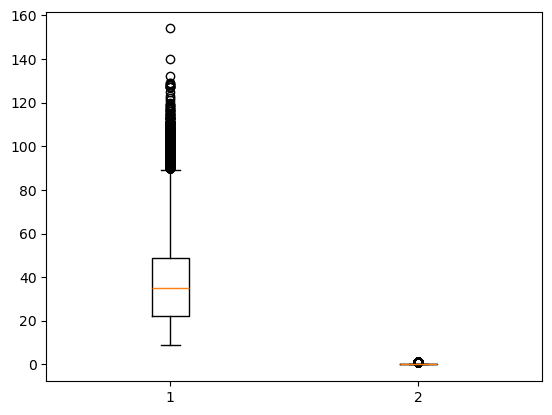

<Figure size 1000x500 with 0 Axes>

In [112]:
df = fraud_df[["purchase_value", "class"]]

plt.boxplot(df)
fig = plt.figure(figsize =(10, 5))
plt.show()


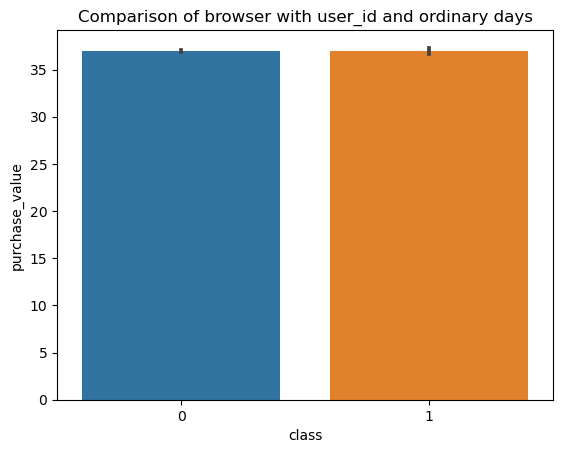

In [106]:
#fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='class', y='purchase_value', data=fraud_df).set_title('Comparison of browser with user_id and ordinary days')

plt.show()

## browser and user_id

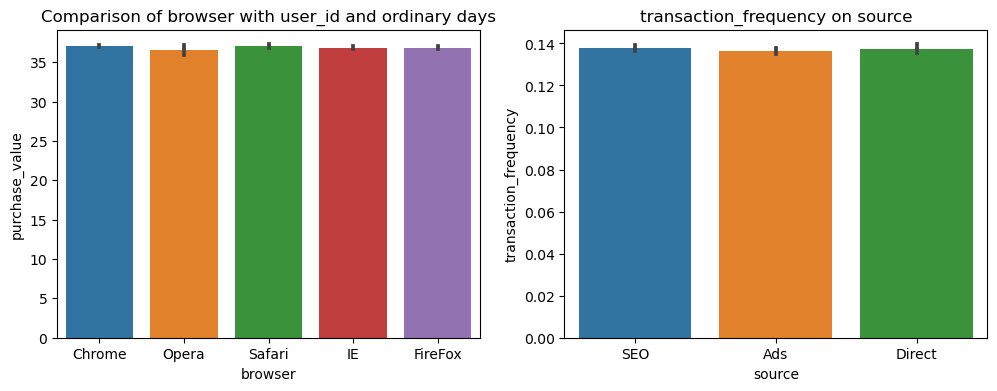

In [114]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='browser', y='purchase_value', data=fraud_df, ax=axis1).set_title('Comparison of browser with user_id and ordinary days')

# holidays only
mask = (fraud_df["browser"] != "0") & (fraud_df["user_id"] > 0)
sns.barplot(x='source', y='transaction_frequency', data=fraud_df[mask], ax=axis2).set_title('transaction_frequency on source')
plt.show()

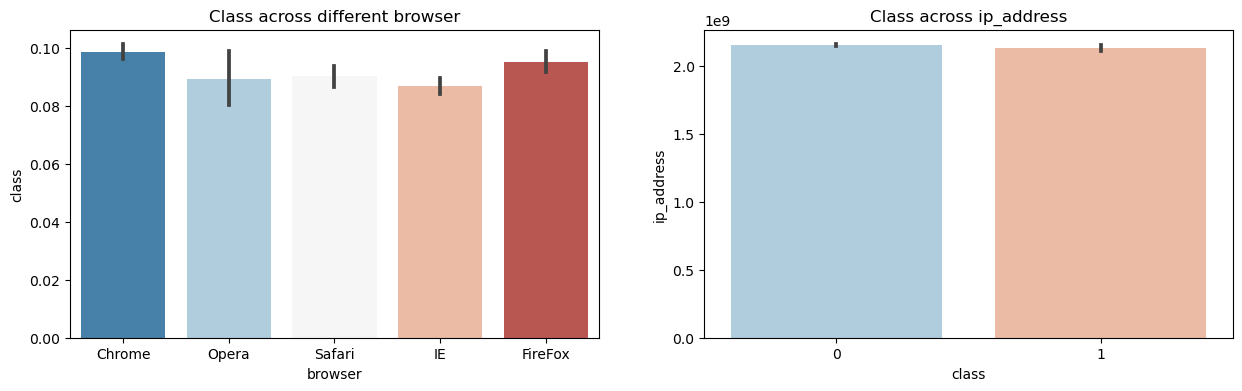

In [115]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='browser', y='class', data=fraud_df, palette = 'RdBu_r', ax=axis1).set_title('Class across different browser')
sns.barplot(x='class', y='ip_address', data=fraud_df, palette = 'RdBu_r', ax=axis2).set_title('Class across ip_address')
plt.show()

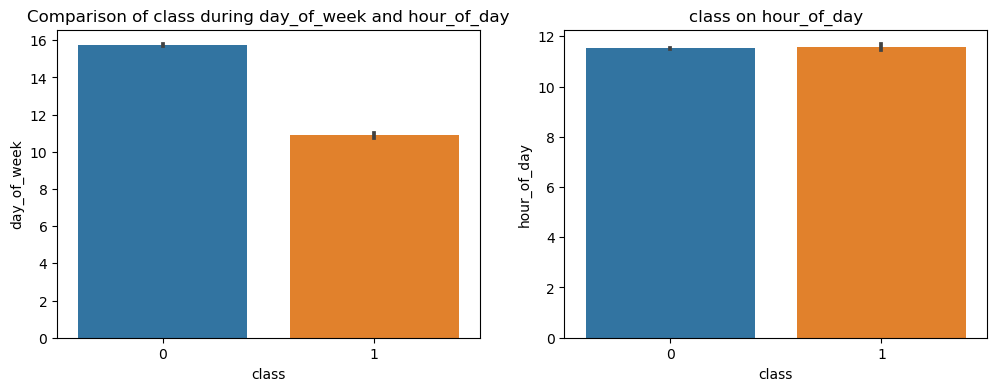

In [116]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='class', y='day_of_week', data=fraud_df, ax=axis1).set_title('Comparison of class during day_of_week and hour_of_day')

# holidays only
mask = (fraud_df["class"] != "0") & (fraud_df["day_of_week"] > 0)
sns.barplot(x='class', y='hour_of_day', data=fraud_df[mask], ax=axis2).set_title('class on hour_of_day')
plt.show()

# Label Encoding

## credit_df

In [117]:
# reading the csv file
geo_df = file_handler.read_csv("../data/geolocation.csv")
geo_df.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0   22058.0  2015-02-24 22:55:49  2015-04-18 02:47:11            34.0   
1  333320.0  2015-06-07 20:39:50  2015-06-08 01:38:54            16.0   
2    1359.0  2015-01-01 18:52:44  2015-01-01 18:52:45            15.0   
3  150084.0  2015-04-28 21:13:25  2015-05-04 13:54:50            44.0   
4  221365.0  2015-07-21 07:09:52  2015-09-09 18:40:53            39.0   
5  159135.0  2015-05-21 06:03:03  2015-07-09 08:05:14            42.0   
6   50116.0  2015-08-01 22:40:52  2015-08-27 03:37:57            11.0   
7  360585.0  2015-04-06 07:35:45  2015-05-25 17:21:14            27.0   
8  159045.0  2015-04-21 23:38:34  2015-06-02 14:01:54            30.0   
9  182338.0  2015-01-25 17:49:49  2015-03-23 23:05:42            62.0   

       device_id source browser sex   age  ip_address  class  hour_of_day  \
0  QVPSPJUOCKZAR    SEO  Chrome   M  39.0   732758368    0.0          2.0   
1  EOGFQPIZPYXFZ    Ads  Chrome   F  53.0   350311387    0.0          1.0   
2  YSSKYOSJHPPLJ    SEO   Opera   M  53.0  2621473820    1.0         18.0   
3  ATGTXKYKUDUQN    SEO  Safari   M  41.0  3840542443    0.0         13.0   
4  NAUITBZFJKHWW    Ads  Safari   M  45.0   415583117    0.0         18.0   
5  ALEYXFXINSXLZ    Ads  Chrome   M  18.0  2809315199    0.0          8.0   
6  IWKVZHJOCLPUR    Ads  Chrome   F  19.0  3987484328    0.0          3.0   
7  HPUCUYLMJBYFW    Ads   Opera   M  34.0  1692458727    0.0         17.0   
8  ILXYDOZIHOOHT    SEO      IE   F  43.0  3719094257    0.0         14.0   
9  NRFFPPHZYFUVC    Ads      IE   M  31.0   341674739    0.0         23.0   

   day_of_week  transaction_time  transaction_frequency  velocity  \
0         18.0  52 days 03:51:22               0.055556  0.003086   
1          8.0   0 days 04:59:04               0.125000  0.015625   
2          1.0   0 days 00:00:01               1.000000  1.000000   
3          4.0   5 days 16:41:25               0.250000  0.062500   
4          9.0  50 days 11:31:01               0.111111  0.012346   
5          9.0  49 days 02:02:11               0.111111  0.012346   
6         27.0  25 days 04:57:05               0.037037  0.001372   
7         25.0  49 days 09:45:29               0.040000  0.001600   
8          2.0  41 days 14:23:20               0.500000  0.250000   
9         23.0  57 days 05:15:53               0.043478  0.001890   

   lower_bound_ip_address  upper_bound_ip_address country  
0                     NaN                     NaN     NaN  
1                     NaN                     NaN     NaN  
2                     NaN                     NaN     NaN  
3                     NaN                     NaN     NaN  
4                     NaN                     NaN     NaN  
5                     NaN                     NaN     NaN  
6                     NaN                     NaN     NaN  
7                     NaN                     NaN     NaN  
8                     NaN                     NaN     NaN  
9                     NaN                     NaN     NaN

In [118]:
percent_missing_values(geo_df)

The dataset contains 46.03 % missing values.


In [119]:
geo_df = geo_df.dropna(how='all',axis=1) 

In [120]:
missing_df = missing_values_table(geo_df)
missing_df

Your selected dataframe has 19 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values    Dtype
country                         151112              52.12   object
upper_bound_ip_address          151112              52.12  float64
lower_bound_ip_address          151112              52.12  float64
signup_time                     138846              47.88   object
velocity                        138846              47.88  float64
transaction_frequency           138846              47.88  float64
transaction_time                138846              47.88   object
day_of_week                     138846              47.88  float64
hour_of_day                     138846              47.88  float64
user_id                         138846              47.88  float64
age                             138846              47.88  float64
sex                             138846              47.88   object
browser                         138846              47.88   object
source                          138846              47.88   object
device_id                       138846              47.88   object
purchase_value                  138846              47.88  float64
purchase_time                   138846              47.88   object
class                           138846              47.88  float64

In [121]:
fix_missing_value(geo_df, ['upper_bound_ip_address', 'lower_bound_ip_address','class','velocity','transaction_frequency','day_of_week','hour_of_day','user_id'], 0)

151112 missing values in the column upper_bound_ip_address have been replaced by 0.
151112 missing values in the column lower_bound_ip_address have been replaced by 0.
138846 missing values in the column class have been replaced by 0.
138846 missing values in the column velocity have been replaced by 0.
138846 missing values in the column transaction_frequency have been replaced by 0.
138846 missing values in the column day_of_week have been replaced by 0.
138846 missing values in the column hour_of_day have been replaced by 0.
138846 missing values in the column user_id have been replaced by 0.


In [122]:
fix_missing_value(geo_df, ['purchase_value', 'age', 'purchase_time'], 0)

138846 missing values in the column purchase_value have been replaced by 0.
138846 missing values in the column age have been replaced by 0.
138846 missing values in the column purchase_time have been replaced by 0.


In [123]:
fix_missing_value(geo_df, ['country', 'signup_time', 'transaction_time', 'sex', 'browser','source', 'device_id'], 0)

151112 missing values in the column country have been replaced by 0.
138846 missing values in the column signup_time have been replaced by 0.
138846 missing values in the column transaction_time have been replaced by 0.
138846 missing values in the column sex have been replaced by 0.
138846 missing values in the column browser have been replaced by 0.
138846 missing values in the column source have been replaced by 0.
138846 missing values in the column device_id have been replaced by 0.


In [124]:
percent_missing_values(geo_df)

The dataset contains 0.0 % missing values.


# One-Hot Encoding

In [125]:
# unique value counts
counts_df = geo_df['source'].value_counts()
counts_df

source
0         138846
SEO        60615
Ads        59881
Direct     30616
Name: count, dtype: int64

In [126]:
encoder= ce.OrdinalEncoder(cols=['source'],return_df=True,
                           mapping=[{'col':'source',
'mapping':{'None':0,'SEO':1,'Ads':2,'Direct':3}}])

In [127]:
geo_df = encoder.fit_transform(geo_df)

In [128]:
# unique value counts
counts_df = geo_df['browser'].value_counts()
counts_df

browser
0          138846
Chrome      61432
IE          36727
Safari      24667
FireFox     24610
Opera        3676
Name: count, dtype: int64

In [129]:
encoder= ce.OrdinalEncoder(cols=['browser'],return_df=True,
                           mapping=[{'col':'browser',
'mapping':{'None':0,'Chrome':1,'IE':2,'Safari':3,'FireFox':4,'Opera':5}}])

In [130]:
geo_df = encoder.fit_transform(geo_df)

In [131]:
# unique value counts
counts_df = geo_df['sex'].value_counts()
counts_df

sex
0    138846
M     88293
F     62819
Name: count, dtype: int64

In [132]:
encoder= ce.OrdinalEncoder(cols=['sex'],return_df=True,
                           mapping=[{'col':'sex',
'mapping':{'F':0,'M':1}}])

In [133]:
geo_df = encoder.fit_transform(geo_df)

In [134]:
geo_df.sample(5)

user_id          signup_time        purchase_time  purchase_value  \
42062   364308.0  2015-06-15 20:15:19  2015-07-03 05:49:05            40.0   
59035   172632.0  2015-08-10 18:15:33  2015-12-02 23:23:55            30.0   
106803  135858.0  2015-06-19 21:07:13  2015-09-25 02:15:18            19.0   
47046   260700.0  2015-02-28 20:18:54  2015-06-23 12:09:00            31.0   
265858       0.0                    0                    0             0.0   

            device_id  source  browser  sex   age  ip_address  class  \
42062   DMMVJOTDMQFEB     1.0      2.0  1.0  39.0  1542824968    0.0   
59035   XBLVHJAQVLFEW     1.0      3.0  0.0  38.0  2733886307    0.0   
106803  OSAYXOELLZBXO     1.0      1.0  1.0  23.0  3134866917    0.0   
47046   UPRDAXZBAMXZC     1.0      4.0  0.0  36.0  1975920683    0.0   
265858              0    -1.0     -1.0 -1.0   0.0        1023    0.0   

        hour_of_day  day_of_week   transaction_time  transaction_frequency  \
42062           5.0          3.0   17 days 09:33:46               0.333333   
59035          23.0          2.0  114 days 05:08:22               0.500000   
106803          2.0         25.0   97 days 05:08:05               0.040000   
47046          12.0         23.0  114 days 15:50:06               0.043478   
265858          0.0          0.0                  0               0.000000   

        velocity  lower_bound_ip_address  upper_bound_ip_address    country  
42062   0.111111            0.000000e+00            0.000000e+00          0  
59035   0.250000            0.000000e+00            0.000000e+00          0  
106803  0.001600            0.000000e+00            0.000000e+00          0  
47046   0.001890            0.000000e+00            0.000000e+00          0  
265858  0.000000            3.406412e+09            3.406413e+09  Australia

In [135]:
geo_df.dtypes

user_id                   float64
signup_time                object
purchase_time              object
purchase_value            float64
device_id                  object
source                    float64
browser                   float64
sex                       float64
age                       float64
ip_address                  int64
class                     float64
hour_of_day               float64
day_of_week               float64
transaction_time           object
transaction_frequency     float64
velocity                  float64
lower_bound_ip_address    float64
upper_bound_ip_address    float64
country                    object
dtype: object

In [136]:
# get the columns with object data type
string_columns = geo_df.select_dtypes(include='object').columns.tolist()
string_columns

['signup_time', 'purchase_time', 'device_id', 'transaction_time', 'country']

In [140]:
convert_to_string(geo_df, string_columns)

In [150]:
geo_df.head(5)

user_id          signup_time        purchase_time  purchase_value  \
0   22058.0  2015-02-24 22:55:49  2015-04-18 02:47:11            34.0   
1  333320.0  2015-06-07 20:39:50  2015-06-08 01:38:54            16.0   
2    1359.0  2015-01-01 18:52:44  2015-01-01 18:52:45            15.0   
3  150084.0  2015-04-28 21:13:25  2015-05-04 13:54:50            44.0   
4  221365.0  2015-07-21 07:09:52  2015-09-09 18:40:53            39.0   

       device_id  source  browser  sex   age  ip_address  class  hour_of_day  \
0  QVPSPJUOCKZAR     1.0      1.0  1.0  39.0   732758368    0.0          2.0   
1  EOGFQPIZPYXFZ     2.0      1.0  0.0  53.0   350311387    0.0          1.0   
2  YSSKYOSJHPPLJ     1.0      5.0  1.0  53.0  2621473820    1.0         18.0   
3  ATGTXKYKUDUQN     1.0      3.0  1.0  41.0  3840542443    0.0         13.0   
4  NAUITBZFJKHWW     2.0      3.0  1.0  45.0   415583117    0.0         18.0   

   day_of_week  transaction_time  transaction_frequency  velocity  \
0         18.0  52 days 03:51:22               0.055556  0.003086   
1          8.0   0 days 04:59:04               0.125000  0.015625   
2          1.0   0 days 00:00:01               1.000000  1.000000   
3          4.0   5 days 16:41:25               0.250000  0.062500   
4          9.0  50 days 11:31:01               0.111111  0.012346   

   lower_bound_ip_address  upper_bound_ip_address country  
0                     0.0                     0.0       0  
1                     0.0                     0.0       0  
2                     0.0                     0.0       0  
3                     0.0                     0.0       0  
4                     0.0                     0.0       0

In [148]:
# save merged dataframe
file_handler.to_csv(geo_df, '../data/geolocation.csv')